In [1]:
from collections import defaultdict, OrderedDict
from operator import itemgetter
import numpy as np
import cv2
from colorthief import ColorThief
import io
from colorutils import Color
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
class Palettization():
    """processes a single image path and returns image, centroids(dominant colors), palette"""
    
    def __init__(self, img_path):
        self.img_path = img_path
        self.rgb_palette = self.get_rgb_palette()
        self.hsv_palette = self.get_hsv_palette()
        self.color_arr = self.get_color_array()
        self.centroid_lst = self.arrayify_centroids()
        self.counts = self.centroid_cos_similar()

    def get_rgb_palette(self):
        """return image color palette"""
        colorthief = ColorThief(self.img_path)
        rgb_palette = colorthief.get_palette(color_count=9, quality=1)
        return rgb_palette


    def get_color_array(self):
        """return array of palette colors"""
        color_arr = []
        for color in self.rgb_palette:
            color_val = []
            for rgb_val in color:
                color_val.append(rgb_val / 255)
            color_arr.append(tuple(color_val))
        return color_arr


    def arrayify_centroids(self):
        """return array of image palette (centroids)"""
        self.centroid_lst = np.array(self.rgb_palette)
        return self.centroid_lst
    
    def _centroid_cos_similar(self, pixels, centroid):
        numerator = (pixels * centroid).sum(axis=1)
        denominator = (np.linalg.norm(pixels, axis=1) * np.linalg.norm(centroid))
        return (numerator / denominator)  


    def centroid_cos_similar(self):
        """"""
        lst = []
        self.centroid_lst = self.rgb_palette
        img = cv2.imread(self.img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for centroid in self.centroid_lst:
            lst.append(self._centroid_cos_similar(img.reshape(-1, 3), centroid))

        centroid_argmax = np.array(lst).argmax(axis=0)

        _, counts = np.unique(centroid_argmax, return_counts=True)
        return counts

    
    def get_hsv_palette(self):
        palette_hsv = []
        for color in self.rgb_palette:
            c = Color(color)
            palette_hsv.append(c.hsv)
        return palette_hsv
    
    def zip_centroid_count(self):
        """"""
        return [{'rgb': rgb, 'count':count} for rgb, count in zip(self.rgb_palette, self.counts)]
    
    
    def display_palette(self):
        """"""
        self.get_color_array()
        return plt.imshow([(self.color_arr)])

    
    def display_img(self):
        """"""
        colorthief = ColorThief(self.img_path)
        img = colorthief.image
        return img

In [451]:
class SetSimilarity():
    """find set(palette) most 'central' of sets, consisting of items(rgb vector) """
    
    #def __init__(self, set_of_palettes):
    #    self.p_list= list_of_palettes
        
    def c2c_dist(self, color_a, color_b):
        """return the distance(float) between two items(rgb vectors)"""
        dist_c2c = np.linalg.norm(np.array(color_a) - np.array(color_b))
        return(dist_c2c)
                
    def c2p_dist(self, color_a, palette_b):
        """return minimum distance(float) between an item(rgb vector) and a set(palette)"""
        """find min dist between color_a and all colors in palet_b
        use c2c_dist"""
        dist_c2p_list = []
        for color in palette_b:
            dist = self.c2c_dist(color, color_a)
            dist_c2p_list.append(dist)
        dist_c2p = np.amin(dist_c2p_list)
        return(dist_c2p)
    
    def p2p_dist(self, palette_a, palette_b):
        """return sum(float) of c2p_dist between two sets(palette)"""
        # sum of c2p-dists
        dist_p2p_list = []
        for color in palette_a:
            dist_p2p_list.append(self.c2p_dist(color, palette_b))
            dist_p2p = np.sum(dist_p2p_list)
        return(dist_p2p)
    
    def set_central_list(self, list_of_palettes):
        """return most 'central' set(palette(s), if there are multiples)"""
        p_cent_list = []

        for palette_a in list_of_palettes:
            palette_a_centrality_list = []

            for palette in list_of_palettes:
                palette_a_centrality_list.append(self.p2p_dist(palette_a, palette))
                
            sum_temp = np.sum(palette_a_centrality_list)
            p_cent_list.append((sum_temp, palette_a))

        p_min = min(p_cent_list, key=itemgetter(0))[0]
        p_cent_list_srtd = sorted(p_cent_list, key=lambda x: x[0])
        
        p_central = [ x for x in p_cent_list_srtd if x[0]==p_min ]
        return(p_central)

In [49]:
def run_palettization_to_rgb_list(images):
    p_list = []
    for link in images:
        img = str(link)
        p = Palettization(img)
        p_list.append(p.get_rgb_palette())
    return p_list

In [110]:
def get_color_array(palette):
    """return array of palette colors"""
    color_arr = []
    for color in palette:
        color_val = []
        for rgb_val in color:
            color_val.append(rgb_val / 255)
        color_arr.append(tuple(color_val))
    return color_arr


def display_palette(palette):
    """"""
    color_arr = get_color_array(palette)
    return plt.imshow([(color_arr)])

In [447]:
seventies_palettes = run_palettization_to_rgb_list(seventies_links)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [452]:
seventies_similarity = SetSimilarity()

In [455]:
seventies_central_palette = seventies_similarity.set_central_list(seventies_palettes)

In [485]:
seventies_central_palette

[(16452.039243170468,
  [(38, 31, 22),
   (124, 72, 45),
   (236, 222, 184),
   (216, 123, 76),
   (177, 146, 78),
   (177, 100, 67),
   (203, 166, 161),
   (142, 113, 107)])]

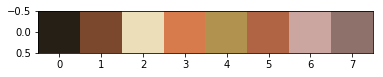

In [486]:
display_palette(seventies_central_palette[0][1])

In [487]:
idx = 1
display_palette(sev)

NameError: name 'sev' is not defined

In [551]:
pure_palette_list = []
for palette in seventies_central_palette:
    pure_palette_list.append(palette[0])

In [541]:
pure_palette_list.clear()

In [552]:
display_palette(pure_palette_list)

TypeError: 'numpy.float64' object is not iterable

In [545]:
len(pure_palette_list)

42

In [553]:
pure_hsv_palette_list = []
for palette in seventies_palettes:
    pure_hsv_palette_list.append(palette[0])
    
# pure_hsv_palette_list

In [554]:
display_palette(seventies_central_palette)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [427]:
seventies_raw = ['1main.jpg',
'208b9fb5b409ba3779a5d3e98f41f35b--vintage-ads-retro-ads.jpg',
'3075165968_c9215cbb36.jpg',
'4080666566_6704eebaa1_o.jpg',
'45728eac5b9ee8c9e2d3cfed76397272--crochet-vests-crochet-sweaters.jpg',
'526e535cbb654194d8b622207a550fea.jpg',
'5c4aacc11d49fed320586cb53a482403.jpg',
'620e711e599d1f500ae87071f33dd5a0--s-decor-retro-home-decor.jpg',
'6709227143_3d1801bd98_b-520x733.jpg',
'70s-men-fashion-281__700.jpg',
'70sheader.png',
'91f9d50398c88b2c580e89184b9edf5a.jpg',
'9d9641f3876091907a691766ac3e938f.jpg',
'Concert-Poster-Art-classic-rock-20804540-450-330.jpg',
'HT_retro_70s_home_1_jt_160905_4x3_992.jpg',
'M-retro-4.jpg',
'Newport-Lights-ad-yellow-t-shirt.jpg',
'Screen-Shot-2012-01-27-at-12.43.26-PM1.png',
'Václav-Zeman-The-First-Generation-1974.jpg',
'Ydz9c-1468504224-1001-blog-spacefoodsticks_main_1200.jpg',
'aT15w-1458316051-754-blog-sunshinefamily_ad_76.jpg',
'aria-pura_fmt.jpg',
'aruba.jpg',
'b30d8a5b3cfce748b55f598119acd0ba--vintage-outfits-fashion-vintage.jpg',
'b9cef75289fc9f54858fc388ef42f942--feminism-poster-political-posters.jpg',
'bowie.jpg',
'brady_bunch_1970s.jpg',
'cc8b7ccff0b23511d0c622fcd297c02c.jpg',
'ce6691c717766c095c8735eecb406aac.jpg',
'd218b4051bfa39178b82c77f9c97c34d--big-mouths-vintage-toys-s.jpg',
'doublemint_ad_2_1975_copy.jpg',
'e10-254_500.jpg',
'efdbc9532e8260b63d0b48745a5916d7.jpg',
'f35a887378aee1d226631089e486b38e.jpg',
'human_factor_poster_01.jpg',
'landscape-1463088645-1970s-toys-collage.jpg',
'london-colourful-life-in-the-1970s-07-1024x614_c.jpg',
'milton-16340-31.jpeg',
'poster-grandfather-computer-22832.jpg',
'posters10n-3-web.jpg',
'room.jpg',
'slang-1970s.png']

In [400]:
rgb = (0, 255, 0)
c = Color(rgb)
print(c.hsv)
# print(plt.imshow([[c.hsv]]))

(120.0, 1.0, 1.0)


In [462]:
print(pure_palette_list)

[(235, 132, 43), (82, 37, 9), (201, 179, 136), (65, 68, 66), (163, 51, 27), (227, 93, 64), (232, 166, 170), (223, 186, 116), (240, 152, 11), (38, 31, 22), (234, 162, 99), (236, 221, 196), (219, 172, 108), (226, 125, 49), (202, 59, 58), (241, 201, 48), (58, 80, 49), (156, 62, 44), (231, 223, 214), (37, 77, 53), (43, 20, 17), (61, 155, 193), (210, 136, 63), (181, 113, 58), (43, 29, 20), (206, 48, 23), (38, 57, 73), (225, 78, 7), (185, 47, 23), (200, 105, 53), (231, 184, 182), (60, 98, 116), (45, 139, 130), (223, 94, 61), (233, 202, 183), (225, 36, 26), (29, 33, 55), (205, 86, 80), (229, 208, 149), (35, 82, 66), (59, 19, 12), (236, 67, 148)]


In [2]:
test_images = ['/Users/Rabbit/Downloads/china_test.jpg', 
               '/Users/Rabbit/Downloads/vilnius_test.jpg', 
               '/Users/Rabbit/Downloads/spices_test.jpg']

In [3]:
loc_fashion_images = ['/Users/Rabbit/capstone/materials/scrape_fashion_2/2003.86.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.44.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.2.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2007.30.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2008.4.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2010.98.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/74.32.4.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/80.1.4.png']

In [54]:
ColorThief?

In [4]:
# img_path = loc_fashion_images[1]

In [5]:
img_path = test_images[1]

In [21]:
test_images

['/Users/Rabbit/Downloads/china_test.jpg',
 '/Users/Rabbit/Downloads/vilnius_test.jpg',
 '/Users/Rabbit/Downloads/spices_test.jpg']

In [70]:
decade_palettes = [ [(0.0, [(201, 195, 193), (31, 30, 29), (165, 151, 138), (148, 135, 126), (94, 89, 87), (119, 115, 112), (84, 84, 80), (101, 100, 92)])],
                    [(3442.1891140569815, [(205, 202, 198), (33, 31, 28), (121, 119, 114), (157, 150, 139), (92, 92, 86), (100, 91, 86), (148, 139, 131), (102, 100, 91)])],
                    [(3899.103815534721, [(214, 210, 207), (80, 66, 50), (153, 139, 121), (112, 96, 79), (126, 111, 89), (188, 174, 156), (148, 148, 148), (156, 148, 149)])],
                    [(7872.9902950932819, [(66, 52, 45), (222, 222, 222), (110, 93, 82), (135, 128, 123), (122, 109, 97), (100, 100, 95), (165, 153, 147), (170, 164, 155)])],
                    [(15468.418055458445, [(44, 44, 44), (205, 204, 201), (125, 125, 124), (99, 100, 94), (156, 156, 153), (164, 156, 152), (148, 148, 156), (92, 92, 100)])],
                    [(11377.787368176734, [(192, 187, 186), (39, 45, 46), (135, 135, 134), (163, 164, 163), (106, 109, 109), (90, 92, 94), (157, 156, 164), (98, 100, 108)])],
                    [(16861.608719121228, [(49, 46, 43), (195, 192, 189), (130, 128, 127), (155, 158, 161), (91, 86, 82), (148, 148, 156), (104, 99, 100), (107, 108, 106)])],
                    [(38874.991751545182, [(206, 201, 199), (40, 38, 37), (94, 89, 86), (117, 114, 112), (151, 148, 139), (103, 100, 92), (148, 139, 138), (84, 92, 84)])],
                    [(19747.072618635553, [(48, 49, 52), (210, 204, 202), (118, 120, 125), (166, 161, 160), (101, 90, 92), (105, 100, 91), (149, 138, 138), (154, 148, 139)])],
                    [(17851.38526962269, [(181, 176, 172), (68, 65, 58), (116, 111, 103), (221, 220, 225), (131, 128, 125), (92, 84, 84), (84, 83, 84), (140, 124, 124)])],
                    [(20429.461822270936, [(208, 201, 198), (27, 27, 29), (128, 124, 121), (92, 92, 89), (100, 92, 92), (156, 148, 140), (101, 100, 92), (156, 140, 140)])],
                    [(24466.800045832199, [(196, 193, 186), (53, 46, 37), (131, 126, 118), (156, 156, 147), (106, 101, 92), (90, 83, 75), (155, 148, 148), (99, 92, 92)])],
                    [(9728.2550088663593, [(213, 211, 209), (89, 88, 82), (133, 133, 127), (108, 109, 108), (173, 171, 165), (155, 157, 156), (116, 108, 108), (164, 156, 156)])] ]

In [97]:
palette_1880 = pure_palette_list[0]

In [401]:
hsv_palettes = [
[(0.0, [(201, 195, 193), (31, 30, 29), (165, 151, 138), (148, 135, 126), (94, 89, 87), (119, 115, 112), (84, 84, 80), (101, 100, 92)])],
[(21.932750312643389, [(205, 202, 198), (33, 31, 28), (121, 119, 114), (157, 150, 139), (92, 92, 86), (100, 91, 86), (148, 139, 131), (102, 100, 91)])],
[(24.14241698432032, [(66, 52, 45), (222, 222, 222), (110, 93, 82), (135, 128, 123), (122, 109, 97), (100, 100, 95), (165, 153, 147), (170, 164, 155)])],
[(55.344889047438663, [(225, 224, 223), (151, 127, 100), (188, 169, 144), (212, 198, 179), (124, 124, 124), (172, 172, 172), (153, 124, 124), (186, 172, 172)])],
[(133.74628216139538, [(211, 208, 208), (41, 34, 31), (103, 82, 74), (129, 122, 120), (153, 142, 138), (117, 101, 90), (168, 156, 147), (84, 92, 92)])],
[(87.906318108503413, [(181, 179, 177), (59, 49, 38), (87, 72, 59), (223, 221, 218), (115, 103, 92), (101, 87, 72), (136, 120, 106), (151, 136, 119)])],
[(126.15456696139745, [(63, 57, 48), (221, 221, 219), (138, 131, 122), (110, 98, 86), (119, 110, 96), (165, 154, 143), (174, 167, 153), (177, 175, 167)])],
[(277.76148378796586, [(143, 139, 130), (42, 37, 32), (228, 223, 219), (189, 183, 174), (207, 200, 190), (77, 67, 57), (84, 76, 59), (195, 196, 185)])],
[(146.86350031680615, [(212, 210, 207), (52, 42, 38), (106, 92, 86), (130, 122, 118), (119, 108, 99), (92, 92, 87), (162, 157, 147), (157, 146, 141)])],
[(121.14453392085414, [(193, 186, 186), (67, 59, 55), (119, 110, 106), (94, 82, 76), (103, 93, 82), (141, 130, 124), (232, 223, 223), (150, 141, 131)])],
[(133.37420110918586, [(231, 228, 226), (78, 76, 73), (147, 143, 139), (116, 107, 105), (173, 163, 158), (190, 179, 161), (122, 117, 106), (183, 178, 175)])],
[(172.57672755092165, [(196, 193, 186), (53, 46, 37), (131, 126, 118), (156, 156, 147), (106, 101, 92), (90, 83, 75), (155, 148, 148), (99, 92, 92)])],
[(62.529411138383566, [(50, 48, 46), (231, 229, 227), (111, 103, 94), (137, 134, 130), (99, 100, 96), (134, 122, 102), (169, 159, 148), (188, 177, 158)])]
]

In [393]:
rgb = (201, 195, 193)
c = Color(rgb)
print(c.hsv)
# print(plt.imshow([[c.hsv]]))

(15.0, 0.04, 0.788)


In [392]:
rgb = (31, 30, 29)
c = Color(rgb)
print(c.hsv)
# print(plt.imshow([[c.hsv]]))

(30.0, 0.065, 0.122)


In [424]:
idx = 2

AxesImage(54,36;334.8x217.44)


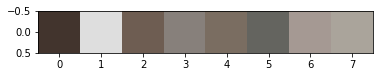

In [425]:
print(display_palette(pure_hsv_palette_list[idx]))

('1910', [(214, 210, 207), (80, 66, 50), (153, 139, 121), (112, 96, 79), (126, 111, 89), (188, 174, 156), (148, 148, 148), (156, 148, 149)])
AxesImage(54,36;334.8x217.44)


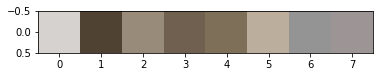

In [426]:
print(labeled_palettes[idx])
print(display_palette(pure_palette_list[idx]))

('1880', [(201, 195, 193), (31, 30, 29), (165, 151, 138), (148, 135, 126), (94, 89, 87), (119, 115, 112), (84, 84, 80), (101, 100, 92)])
AxesImage(54,36;334.8x217.44)


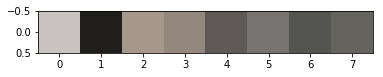

In [276]:
print(labeled_palettes[0])
print(display_palette(pure_palette_list[0]))

('1900', [(205, 202, 198), (33, 31, 28), (121, 119, 114), (157, 150, 139), (92, 92, 86), (100, 91, 86), (148, 139, 131), (102, 100, 91)])
AxesImage(54,36;334.8x217.44)


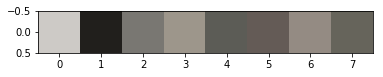

In [259]:
print(labeled_palettes[1])
print(display_palette(pure_palette_list[1]))

('1910', [(214, 210, 207), (80, 66, 50), (153, 139, 121), (112, 96, 79), (126, 111, 89), (188, 174, 156), (148, 148, 148), (156, 148, 149)])
AxesImage(54,36;334.8x217.44)


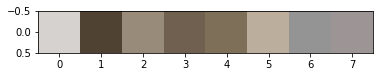

In [273]:
print(labeled_palettes[2])
print(display_palette(pure_palette_list[2]))

('1920', [(66, 52, 45), (222, 222, 222), (110, 93, 82), (135, 128, 123), (122, 109, 97), (100, 100, 95), (165, 153, 147), (170, 164, 155)])
AxesImage(54,36;334.8x217.44)


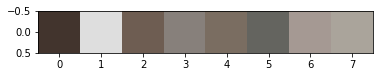

In [261]:
print(labeled_palettes[3])
print(display_palette(pure_palette_list[3]))

('1930', [(44, 44, 44), (205, 204, 201), (125, 125, 124), (99, 100, 94), (156, 156, 153), (164, 156, 152), (148, 148, 156), (92, 92, 100)])
AxesImage(54,36;334.8x217.44)


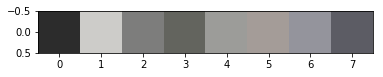

In [262]:
print(labeled_palettes[4])
print(display_palette(pure_palette_list[4]))

('1940', [(192, 187, 186), (39, 45, 46), (135, 135, 134), (163, 164, 163), (106, 109, 109), (90, 92, 94), (157, 156, 164), (98, 100, 108)])
AxesImage(54,36;334.8x217.44)


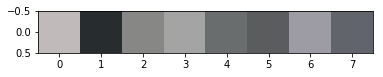

In [263]:
print(labeled_palettes[5])
print(display_palette(pure_palette_list[5]))

('1950', [(49, 46, 43), (195, 192, 189), (130, 128, 127), (155, 158, 161), (91, 86, 82), (148, 148, 156), (104, 99, 100), (107, 108, 106)])
AxesImage(54,36;334.8x217.44)


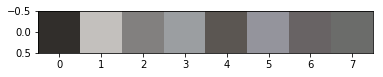

In [264]:
print(labeled_palettes[6])
print(display_palette(pure_palette_list[6]))

('1960', [(206, 201, 199), (40, 38, 37), (94, 89, 86), (117, 114, 112), (151, 148, 139), (103, 100, 92), (148, 139, 138), (84, 92, 84)])
AxesImage(54,36;334.8x217.44)


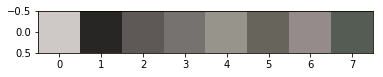

In [265]:
print(labeled_palettes[7])
print(display_palette(pure_palette_list[7]))

('1970', [(48, 49, 52), (210, 204, 202), (118, 120, 125), (166, 161, 160), (101, 90, 92), (105, 100, 91), (149, 138, 138), (154, 148, 139)])
AxesImage(54,36;334.8x217.44)


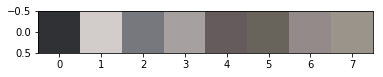

In [266]:
print(labeled_palettes[8])
print(display_palette(pure_palette_list[8]))

('1980', [(181, 176, 172), (68, 65, 58), (116, 111, 103), (221, 220, 225), (131, 128, 125), (92, 84, 84), (84, 83, 84), (140, 124, 124)])
AxesImage(54,36;334.8x217.44)


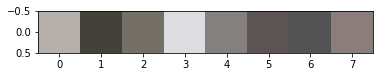

In [267]:
print(labeled_palettes[9])
print(display_palette(pure_palette_list[9]))

('1990', [(208, 201, 198), (27, 27, 29), (128, 124, 121), (92, 92, 89), (100, 92, 92), (156, 148, 140), (101, 100, 92), (156, 140, 140)])
AxesImage(54,36;334.8x217.44)


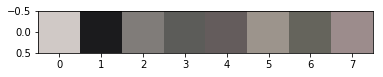

In [268]:
print(labeled_palettes[10])
print(display_palette(pure_palette_list[10]))

('2000', [(196, 193, 186), (53, 46, 37), (131, 126, 118), (156, 156, 147), (106, 101, 92), (90, 83, 75), (155, 148, 148), (99, 92, 92)])
AxesImage(54,36;334.8x217.44)


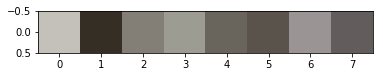

In [269]:
print(labeled_palettes[11])
print(display_palette(pure_palette_list[11]))

('2010', [(213, 211, 209), (89, 88, 82), (133, 133, 127), (108, 109, 108), (173, 171, 165), (155, 157, 156), (116, 108, 108), (164, 156, 156)])
AxesImage(54,36;334.8x217.44)


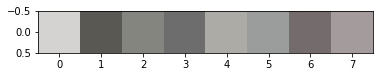

In [270]:
print(labeled_palettes[12])
print(display_palette(pure_palette_list[12]))

In [50]:
run_palettization_to_rgb_list(test_images)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


[[(152, 173, 201),
  (33, 13, 12),
  (156, 14, 12),
  (170, 83, 69),
  (228, 228, 236),
  (145, 130, 127),
  (148, 98, 110),
  (124, 60, 132)],
 [(200, 161, 70),
  (36, 46, 40),
  (130, 146, 146),
  (171, 176, 172),
  (123, 145, 125),
  (109, 112, 101),
  (62, 85, 101),
  (73, 97, 67)],
 [(42, 28, 29),
  (228, 223, 204),
  (122, 56, 37),
  (172, 171, 171),
  (210, 165, 89),
  (210, 113, 29),
  (132, 122, 120),
  (157, 119, 81)]]

In [163]:
decades = ['1880', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010']

In [164]:
len(decades)

13

In [170]:
labeled_palettes = list(zip(decades, pure_palette_list))

In [172]:
labeled_palettes

[('1880',
  [(201, 195, 193),
   (31, 30, 29),
   (165, 151, 138),
   (148, 135, 126),
   (94, 89, 87),
   (119, 115, 112),
   (84, 84, 80),
   (101, 100, 92)]),
 ('1900',
  [(205, 202, 198),
   (33, 31, 28),
   (121, 119, 114),
   (157, 150, 139),
   (92, 92, 86),
   (100, 91, 86),
   (148, 139, 131),
   (102, 100, 91)]),
 ('1910',
  [(214, 210, 207),
   (80, 66, 50),
   (153, 139, 121),
   (112, 96, 79),
   (126, 111, 89),
   (188, 174, 156),
   (148, 148, 148),
   (156, 148, 149)]),
 ('1920',
  [(66, 52, 45),
   (222, 222, 222),
   (110, 93, 82),
   (135, 128, 123),
   (122, 109, 97),
   (100, 100, 95),
   (165, 153, 147),
   (170, 164, 155)]),
 ('1930',
  [(44, 44, 44),
   (205, 204, 201),
   (125, 125, 124),
   (99, 100, 94),
   (156, 156, 153),
   (164, 156, 152),
   (148, 148, 156),
   (92, 92, 100)]),
 ('1940',
  [(192, 187, 186),
   (39, 45, 46),
   (135, 135, 134),
   (163, 164, 163),
   (106, 109, 109),
   (90, 92, 94),
   (157, 156, 164),
   (98, 100, 108)]),
 ('1950',
  [(

In [51]:
run_palettization_to_rgb_list(loc_fashion_images)

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


[[(234, 232, 230),
  (68, 60, 54),
  (149, 129, 98),
  (131, 98, 76),
  (150, 145, 132),
  (181, 157, 130),
  (198, 181, 152),
  (108, 132, 93)],
 [(208, 205, 207),
  (175, 136, 71),
  (67, 51, 44),
  (114, 81, 50),
  (168, 168, 171),
  (199, 168, 120),
  (122, 118, 117),
  (162, 136, 109)],
 [(121, 139, 157),
  (76, 36, 23),
  (133, 79, 57),
  (227, 220, 214),
  (174, 131, 113),
  (51, 68, 81),
  (185, 196, 212),
  (188, 204, 210)],
 [(143, 166, 184),
  (122, 102, 70),
  (88, 64, 41),
  (227, 219, 204),
  (152, 135, 108),
  (47, 35, 22),
  (188, 212, 231),
  (91, 119, 139)],
 [(106, 106, 105),
  (160, 123, 116),
  (100, 32, 34),
  (218, 220, 220),
  (192, 113, 111),
  (95, 63, 38),
  (41, 38, 35),
  (161, 172, 180)],
 [(118, 109, 110),
  (212, 155, 158),
  (119, 33, 41),
  (27, 8, 8),
  (173, 94, 100),
  (186, 189, 189),
  (181, 179, 188),
  (118, 52, 43)],
 [(177, 171, 172),
  (47, 51, 34),
  (88, 94, 70),
  (111, 111, 98),
  (226, 225, 226),
  (87, 72, 59),
  (133, 126, 115),
  (132

In [ ]:
# %pdb

In [13]:
c = Color((0,0,0))

In [17]:
c.hsv

(0, 0, 0.0)

In [ ]:
palette_me_now = Palettization(img_path)

In [ ]:
# %pdb

In [ ]:
palette_me_now.zip_centroid_count()

In [ ]:
# img_palette

In [ ]:
palette_me_now.get_hsv_palette()

In [64]:
from colorthief import ColorThief

In [65]:
era = decade_palettes[0]

In [66]:
era_palette = ColorThief(era)

AttributeError: 'list' object has no attribute 'read'

In [430]:
!ls ../..

1970s_google_imgs              dyanye_clothing_era_classifier
brainstorming_sess_img         materials


In [437]:
seventies_links = []

for img in seventies_raw:
    seventies_links.append('/Users/Rabbit/capstone/1970s_google_imgs/'+ str(img))

In [438]:
seventies_links[0]

'/Users/Rabbit/capstone/1970s_google_imgs/1main.jpg'

In [439]:
try_me = [Palettization(link) for link in seventies_links]

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [446]:
try_me

[{'count': 42357, 'rgb': (201, 179, 136)},
 {'count': 11071, 'rgb': (36, 24, 20)},
 {'count': 33557, 'rgb': (120, 48, 38)},
 {'count': 6418, 'rgb': (105, 119, 112)},
 {'count': 30154, 'rgb': (127, 97, 47)},
 {'count': 43816, 'rgb': (240, 237, 218)},
 {'count': 18282, 'rgb': (167, 102, 91)},
 {'count': 2845, 'rgb': (52, 148, 191)}]

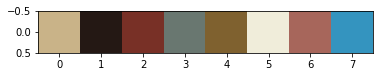

In [539]:
i = 2
try_me[i].display_palette()

try_me[i].zip_centroid_count()

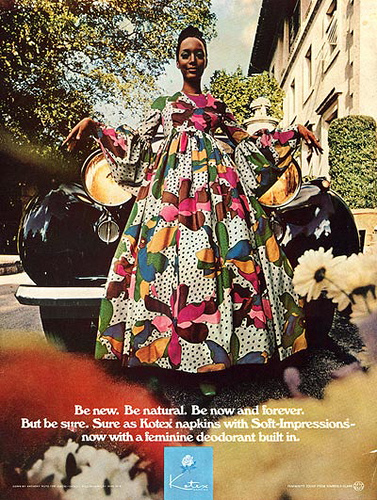

In [540]:
try_me[i].display_img()

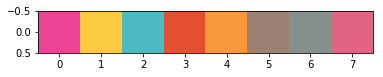

In [514]:
for item in try_me:
    item.display_palette()

In [ ]:
palette_color_percent

In [ ]:
palette_color_percent = {}
# label_
img_pixel_sum = 0

for image in try_me:
    for i in image.zip_centroid_count():
        img_pixel_sum += i['count']
#     print(img_pixel_sum)
        palette_color_percent[i['rgb']] = i['count'] / 540000

sorted(palette_color_percent, key=lambda x: palette_color_percent[x], reverse=True)

In [ ]:
type(var)

In [ ]:
# p_1 = [ (200, 161, 70),
#         (36, 46, 40),
#         (156, 14, 12) ]

# p_2 = [ (152, 173, 201),
#         (172, 171, 171),
#         (122, 56, 37) ]

# p_3 = [ (123, 145, 125),
#         (228, 228, 236),
#         (210, 113, 29) ]

# p_3_a = [ (228, 228, 236),
#           (123, 145, 125),
#           (210, 113, 29) ]

# p_4 = [ (228, 223, 204),
#         (157, 119, 81),
#         (130, 146, 146),
#         (210, 165, 89) ]

# p_5 = [ (33, 13, 12),
#         (42, 28, 29),
#         (132, 122, 120),
#         (170, 83, 69),
#         (145, 130, 127),
#         (109, 112, 101) ]

# p_6 = [ (62, 85, 101),
#         (148, 98, 110),
#         (171, 176, 172),
#         (124, 60, 132),
#         (73, 97, 67) ]

# p_test_lst = [ p_1, p_2, p_3, p_3_a, p_4, p_5, p_6 ]

In [ ]:
# p_test = SetSimilarity()

In [ ]:
print(p_test.c2c_dist(p_1[0], p_1[2]))

print(p_test.c2p_dist(p_1[0], p_2))

print(p_test.p2p_dist(p_1, p_6))

print(p_test.set_central_list(p_test_lst))

In [ ]:
palette_1 = [ ( 255, 0, 0), (0, 255, 0) ]
palette_2 = [ (0, 255, 0), (0, 0, 255), (42, 142, 242), (108, 212, 228) ]
palette_3 = [ (255, 0, 0), (0, 0, 255) ]
palette_4 = [ (127,127,127), (0, 0, 255) ]
palette_5 = [ ( 255, 0, 0), (0, 255, 0) ]
palette_list_ex = [palette_1, palette_2, palette_3, palette_4, palette_5]
color_a = palette_1[0]
color_b = palette_1[1]

In [ ]:
test_other = SetSimilarity()

In [ ]:
print(test_other.c2c_dist(palette_2[0], palette_1[1]))

print(test_other.c2p_dist(color_a, palette_2))

print(test_other.p2p_dist(palette_2, palette_4))

print(test_other.set_central_list(palette_list_ex))

In [ ]:
from colour import Color

In [ ]:
c = Color()

In [ ]:
morning_pic = ['/Users/Rabbit/Desktop/Screen Shot 2017-10-25 at 07.56.08.png',
              '/Users/Rabbit/Desktop/Screen Shot 2017-10-25 at 08.08.44.png', 
              '/Users/Rabbit/Desktop/Screen Shot 2017-10-25 at 08.17.04.png',
              '/Users/Rabbit/Desktop/Screen Shot 2017-10-25 at 08.33.38.png']

In [ ]:
c_harmony = Palettization(morning_pic[0])

In [ ]:
c_harmony.display_palette()

In [ ]:
c_harmony.zip_centroid_count()

In [ ]:
c_harmony.display_img()

In [ ]:
import colorsys

In [ ]:
try_me[1].arrayify_centroids()

In [ ]:
get_palette(img_path)

In [ ]:
plt.imshow([(centroid_lst).astype('uint8')])

In [ ]:
import colorgram

img = (morning_pic[0])

In [ ]:
colors = colorgram.extract(img, 6)

In [ ]:
colors[0]

In [ ]:
# for color in palette_color_percent:
#     r_chan = color[0]
#     b_chan = color[1]
#     g_chan = color[2]
#     r_vals.append(r_chan)
#     b_vals.append(b_chan)
#     g_vals.append(g_chan)

def colorT_rgb2hsv(rgb_vector):
    """returns an hsv vector from rgb"""
    hsv_vector = []
    for color in rgb_vector:
        r_prime = color[0]/255
        b_prime = color[1]/255
        g_prime = color[2]/255
        
        

In [ ]:
import colorsys

def rgb_hsv(rgb_tup):
    """returns hsv tuple from rgb"""
    """thanks for your help Zach E.!"""
    

    r = rgb_tup[0]
    b = rgb_tup[1]
    g = rgb_tup[2]
#         print(r, g, b)
    h, s, v = colorsys.rgb_to_hsv(r / 255., g / 255., b / 255.)
    h = h * 360
    hsv = [h, s, v]
    return tuple(hsv)

In [ ]:
var

In [ ]:
rgb_hsv(var)

In [ ]:
_1 = np.uint8([[_var]])
hsv_1 = cv2.cvtColor(_1, cv2.COLOR_RGB2HSV)

In [ ]:
hsv_1

In [ ]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)
print(hsv_green)

In [ ]:
var = (108, 212, 228)

In [ ]:
from colorutils import Color

def get_hsv(rgb):
    c = Color(rgb)
    return c.hsv

In [ ]:
get_hsv(var)
    
    
    

In [ ]:
rgb2hsv(var)